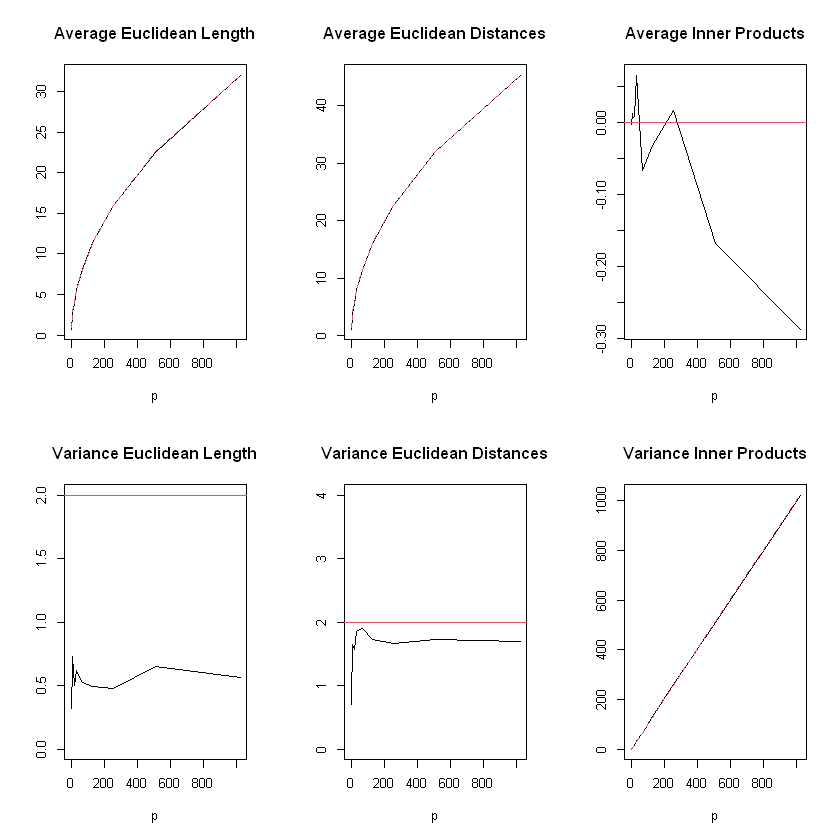

In [1]:
# load library to sample from multivariate normal distribution
library(mvtnorm)

# compute average euclidean length of a matrix x (rows = samples)
average_euclidean_length <- function(x){
  mean(apply(x,1,norm,type="2"))
}

# compute variance of euclidean lengths of a matrix x (rows = samples)
variance_euclidean_length <- function(x){
  var(apply(x,1,norm,type="2"))
}

# compute average euclidean distances between matrices x and x2 (rows = samples)
average_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  mean(apply(z,1,norm,type="2"))
}

# compute variance of euclidean distances between matrices x and x2 
variance_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  var(apply(z,1,norm,type="2"))
}

# compute average inner products between matrices x and x2 (rows = samples)
average_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  mean(z)
}

# compute varaince of inner products between matrices x and x2 (rows = samples)
variance_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  var(z)
}


set.seed(5)

p_range         <- 2^seq(0,10)

avg_eucl_length <- c()
var_eucl_length <- c()
avg_eucl_dist   <- c()
var_eucl_dist   <- c()
avg_inner_prod  <- c()
var_inner_prod  <- c()

n = 100

for (p in p_range){
  
  x               <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  x2              <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  
  avg_eucl_length <- c(avg_eucl_length,average_euclidean_length(x))
  var_eucl_length <- c(var_eucl_length,variance_euclidean_length(x))
  avg_eucl_dist   <- c(avg_eucl_dist,average_euclidean_distances(x,x2))
  var_eucl_dist   <- c(var_eucl_dist,variance_euclidean_distances(x,x2))
  avg_inner_prod  <- c(avg_inner_prod,average_inner_product(x,x2))
  var_inner_prod  <- c(var_inner_prod,variance_inner_product(x,x2))
  
  
}
 
# compare the results visually
par(mfrow=c(2,3))

plot(p_range,avg_eucl_length,type="l",main="Average Euclidean Length",xlab="p",ylab="")
lines(p_range,sqrt(p_range),col=2,lty=2)

plot(p_range,avg_eucl_dist,type="l",main="Average Euclidean Distances",xlab="p",ylab="")
lines(p_range,sqrt(2*p_range),col=2,lty=2)

plot(p_range,avg_inner_prod,type="l",main="Average Inner Products",xlab="p",ylab="")
abline(h=0,col=2)

plot(p_range,var_eucl_length,type="l",main="Variance Euclidean Length",xlab="p",ylab="",ylim=c(0,2))
abline(h=2,col=2)

plot(p_range,var_eucl_dist,type="l",main="Variance Euclidean Distances",xlab="p",ylab="",ylim=c(0,4))
abline(h=2,col=2)

plot(p_range,var_inner_prod,type="l",main="Variance Inner Products",xlab="p",ylab="")
lines(p_range,p_range,col=2,lty=2)


INSERT_text1 _______ INSERT_text2 

INSERT_text3